# 와인 데이터 분석

Wine Quality 데이터셋: 포르투갈 “Vinho Verde” 와인의
화학적 성질과 전문가들에 의해 매겨진 품질 점수(0~10)를 기록한 것이다.

레드 와인과 화이트 와인 두 버전이 있으며,
와인의 품질이 어떤 물리·화학적 요소와 관련되는지 분석하기 위해 만들어졌다.
(와인의 품질(quality)을 예측하기 위한 회귀/분류 연구)
- `winequality-red.csv` : 레드 와인 데이터셋

| 컬럼 이름 | 설명 |
| --- | --- |
| `fixed acidity` | 고정 산도 |
| `volatile acidity` | 휘발성 산도 |
| `citric acid` | 시트르산 |
| `residual sugar` | 잔류 당분 |
| `chlorides` | 염화물 |
| `free sulfur dioxide` | 유리 이산화황 |
| `total sulfur dioxide` | 총 이산화황 |
| `density` | 밀도 |
| `pH` | 산성도 |
| `sulphates` | 황산염 |
| `alcohol` | 알코올 도수 |
| `quality` | 품질 점수 (0-10점); 타겟 변수 |


## 기본 세팅

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 데이터 불러오기
data = pd.read_csv('data/winequality-red.csv', sep=';')
df= pd.DataFrame(data)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Report

In [ ]:
# 결측치 확인
print(df.shape)
df.info()
# 결측치가 없는걸 확인

(1599, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


shape의 출력 결과를 보았을 때, 1599의 행과 12개의 열로 확인 가능.  
df.info를 통해서 결측값과 type 확인.  

=> 모든 변수들에 대해서 1599개의 행이 존재. 따라서 결측치가 없음.
=> 모든 타임이 수치형으로 quality만 정수형.

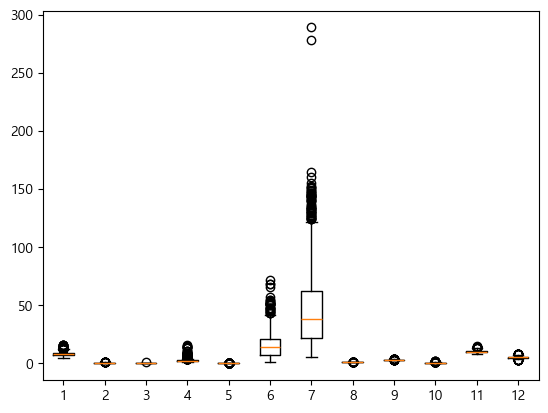

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
# 데이터의 전체적은 분포 확인.
plt.boxplot(df)
plt.show()
df.describe()

In [6]:
# 중복값 확인
print(df.duplicated().value_counts())
print(df.columns)

False    1359
True      240
Name: count, dtype: int64
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [ ]:
# 중복값 제거

**종속변수 quality**에 대한 정보 수집.

   quality  count
0        5    681
1        6    638
2        7    199
3        4     53
4        8     18
5        3     10


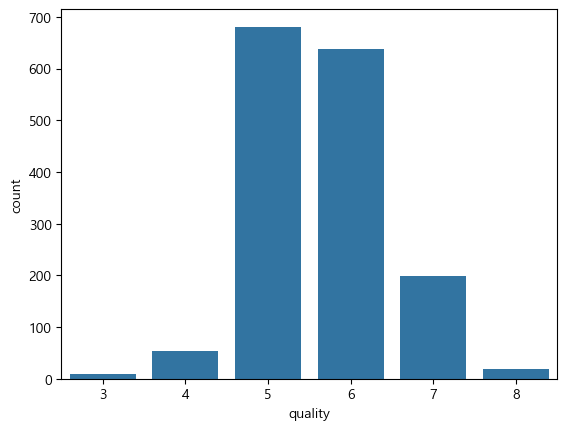

In [8]:
q_df = df['quality'].value_counts().reset_index()
print(q_df)
sns.barplot(data = q_df, x = 'quality', y ='count')
plt.show()

quality가 0부터 10점까지 중 5에서 6점이 높음. -> 점수별로 변수들의 관계를 파악해서, 그거에 대한 비교하기

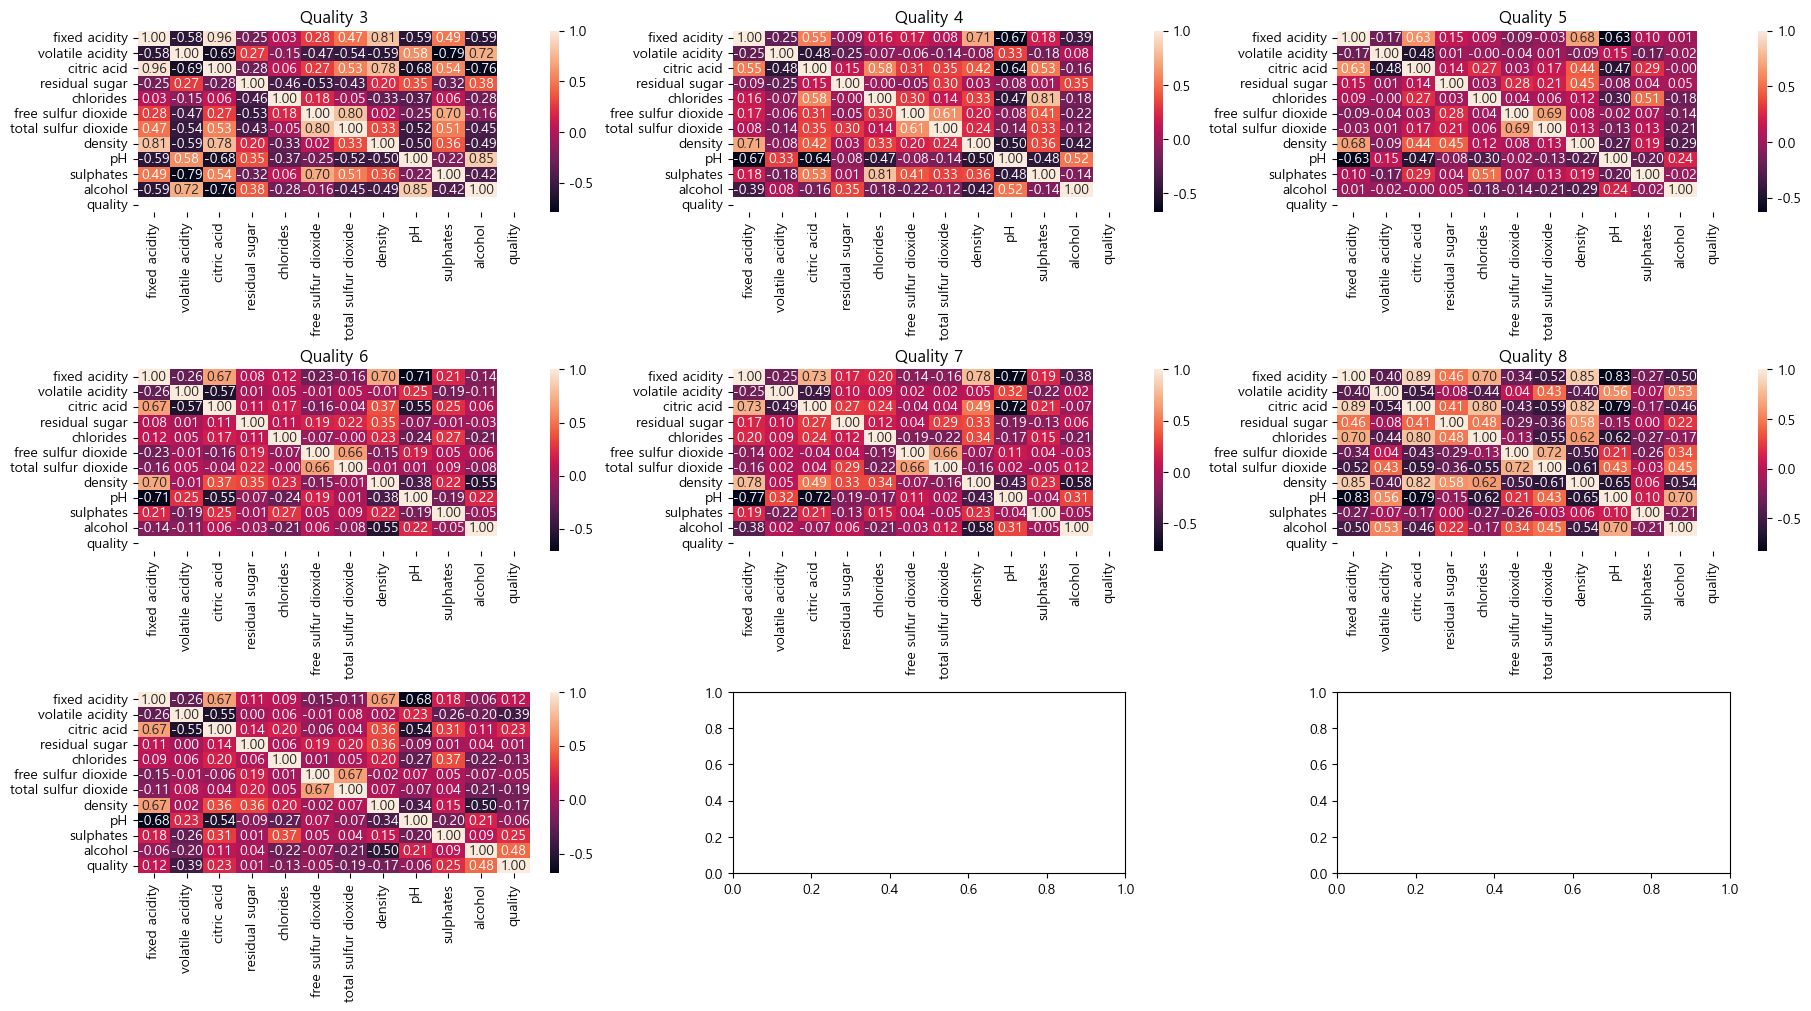

In [19]:
fig, axes = plt.subplots(3, 3, figsize=(18, 10), constrained_layout=True)
axes = axes.flatten()
x1,x2,x3,x4,x5,x6,x7 = axes[:7]

# 3점
df_3 = df[df['quality']==3]
sns.heatmap(df_3.corr(), annot=True, fmt='.2f', ax=x1)
x1.set_title('Quality 3')

# 4점
df_4 = df[df['quality']==4]
sns.heatmap(df_4.corr(), annot=True, fmt='.2f', ax=x2)
x2.set_title('Quality 4')

# 5점
df_5 = df[df['quality']==5]
sns.heatmap(df_5.corr(), annot=True, fmt='.2f', ax=x3)
x3.set_title('Quality 5')

# 6점
df_6 = df[df['quality']==6]
sns.heatmap(df_6.corr(), annot=True, fmt='.2f', ax=x4)
x4.set_title('Quality 6')

# 7점
df_7 = df[df['quality']==7]
sns.heatmap(df_7.corr(), annot=True, fmt='.2f', ax=x5)
x5.set_title('Quality 7')

# 8점
df_8 = df[df['quality']==8]
sns.heatmap(df_8.corr(), annot=True, fmt='.2f', ax=x6)
x6.set_title('Quality 8')

# 전체
sns.heatmap(df.corr(), annot=True, fmt = '.2f', ax = x7)
plt.show()

히트맵을 보았을 때, |0.5|을 기준으로 양과 음 상관관계가 있는 변수들 선택.
- fixed acidity - PH
- fixed acidity - citric acid
- fixed acidity - density
- volatile acidity - citric acid
- ciritic acid - PH
- density - alcohol
- alcohol - quality

## 핵심 인사이트 정리
- 품질 높은 와인은 어떤 경향을 가진다? 등
- 산도/당도/알코올이 품질과 어떤 관계가 있는가? 등
- 데이터의 한계 및 왜곡 가능성 등등